In [1]:
#IMPORTAÇÃO DE BIBLIOTECAS
#!pip install -q glove_python
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
import joblib

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('universal_tagset')
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marcelo Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\

In [3]:
#IMPORTAÇÃO DE BIBLIOTECAS

from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import f1_score


from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Lambda,
    Embedding, Conv1D,
    LSTM, SimpleRNN, GRU
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential


import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
#importing the glove library
#from glove import Corpus, Glove

In [5]:

# 4. Carrega o JSON no DataFrame
df = pd.read_json('../Analise_Sentimento/datasets/reviews_Baby_5.json', orient='columns', lines=True)  # lines=True porque cada linha é um objeto JSON

# 5. Visualiza as primeiras linhas
df.head()


#SE NÃO TIVERES O DATASET USA:
#import gdown
#url = 'https://drive.google.com/uc?id=1Z_y9nw9nQCmuQUJyFUF2DkVw_7KX346b'
#output = 'reviews_Baby_5.json'
#gdown.download(url, output, quiet=False)

#import pandas as pd
#df = pd.read_json('reviews_Baby_5.json', orient='columns', lines=True)
#df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"


In [9]:
df['overall'].value_counts()

overall
5    93526
4    32999
3    17255
2     9193
1     7819
Name: count, dtype: int64

In [11]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1365
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [13]:
def map_sentiment(score):
    if score < 3:
        return 0   # Negativo
    elif score == 3:
        return 2   # Neutro
    else:
        return 1   # Positivo

df['sentiment'] = df['overall'].apply(map_sentiment)

In [15]:
df['sentiment'].value_counts()

sentiment
1    126525
2     17255
0     17012
Name: count, dtype: int64

In [17]:
# Descobre a menor classe
min_class_size = df['sentiment'].value_counts().min()  # 17012

# NEGATIVOS (sentiment 0 → overall 1 e 2)
neg_1_count = df[df['overall'] == 1].shape[0]  # 7819
neg_2_count = df[df['overall'] == 2].shape[0]  # 9193

# Escolhe proporcionalmente para cada rating negativo
df_neg_1 = df[df['overall'] == 1].sample(n=neg_1_count, random_state=42)
df_neg_2 = df[df['overall'] == 2].sample(n=min_class_size - neg_1_count, random_state=42)

df_negative = pd.concat([df_neg_1, df_neg_2])

# NEUTROS (overall 3)
df_neutral = df[df['overall'] == 3].sample(n=min_class_size, random_state=42)

# POSITIVOS (overall 4 e 5)
#pos_4_count = df[df['overall'] == 4].shape[0]  # 32 999
#pos_5_count = df[df['overall'] == 5].shape[0]  # 93 526

# metade cada
half_pos = min_class_size // 2  # 8506
df_pos_4 = df[df['overall'] == 4].sample(n=half_pos, random_state=42)
df_pos_5 = df[df['overall'] == 5].sample(n=half_pos, random_state=42)

df_positive = pd.concat([df_pos_4, df_pos_5])

# Juntar tudo
df_balanced = pd.concat([df_negative, df_neutral, df_positive])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # embaralhar


In [19]:
print("Tamanho do Dataset",df_balanced.shape)

Tamanho do Dataset (51036, 10)


In [99]:
df_balanced['sentiment'].value_counts()

sentiment
1    17012
0    17012
2    17012
Name: count, dtype: int64

Distribuição de críticas positivas (overall = 4 e 5) , negativas (overall = 1 e 2) e neutras (overall = 3)


array([[<Axes: title={'center': 'overall'}>]], dtype=object)

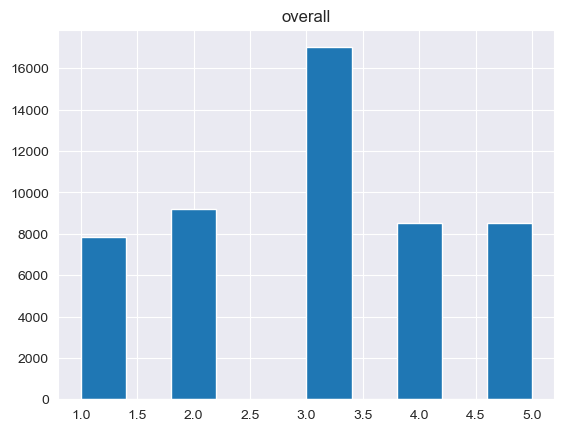

In [101]:
print('Distribuição de críticas positivas (overall = 4 e 5) , negativas (overall = 1 e 2) e neutras (overall = 3)')
df_balanced.hist('overall')

In [103]:
X = df_balanced['reviewText']
y = df_balanced['sentiment']

In [105]:
# Config globais (evita recarregar na função)
STOP_WORDS = set(stopwords.words('english'))
# Preservar mais negações para melhor análise de sentimentos
NEGATIONS = ['not', 'no', 'never', 'neither', 'nor', 'cannot', "can't", 'nothing', 'none', 'nowhere', 'nobody']
for word in NEGATIONS:
    STOP_WORDS.discard(word)

LEMMATIZER = WordNetLemmatizer()
STEMMER = SnowballStemmer('english')


def clean_review(text: str, 
                 remove_stopwords: bool = True,
                 lemmatize: bool = True,
                 stem: bool = False,  # Opcional, para comparação com o original
                 remove_numbers: bool = False,
                 return_tokens: bool = False) -> str | list[str]:
    """
    Função de limpeza otimizada para reviews da Amazon. 
    Compatível com TF-IDF/Word2Vec e modelos como MNB, LR, SVM, KNN, AdaBoost.
    
    Parâmetros:
    - text: texto bruto
    - remove_stopwords: remover stopwords (preservando negações)
    - lemmatize: aplicar lematização (recomendado)
    - stem: aplicar stemming (alternativa, mas menos precisa)
    - remove_numbers: remover números (ex: preços)
    - return_tokens: devolver lista de tokens (para Word2Vec) ou string (para TF-IDF)
    
    Retorna: string limpa ou lista de tokens
    """
    if pd.isna(text) or not isinstance(text, str):
        return "" if not return_tokens else []
    
    # 1. Remover HTML
    text = BeautifulSoup(text, "lxml").get_text()
    
    # 2. Minúsculas
    text = text.lower()
    
    # 3. Remover indesejados
    pattern = r'[^a-z\s]' if remove_numbers else r'[^a-z0-9\s]'
    text = re.sub(pattern, ' ', text)
    
    # 4. Tokenização precisa
    tokens = word_tokenize(text)
    
    # 5. Remover stopwords
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOP_WORDS and len(t) > 1]  # Ignora tokens muito curtos
    
    # 6. Lematização ou stemming
    if lemmatize:
        tokens = [LEMMATIZER.lemmatize(t) for t in tokens]
    elif stem:
        tokens = [STEMMER.stem(t) for t in tokens]
    
    # 7. Retornar
    if return_tokens:
        return tokens
    return ' '.join(tokens)

In [107]:
X_cleaned = []
X_cleaned = [clean_review(text, remove_stopwords=False, lemmatize=True, remove_numbers=True) 
                     for text in X]

In [1]:
len(X_cleaned)

NameError: name 'X_cleaned' is not defined

In [111]:
#Classificação de texto usando Bag of Words com CountVectorizer
countVect = CountVectorizer(
    min_df=10,              # ← menos agressivo
    max_df=0.90,            # ← remove termos muito frequentes
    max_features=20000,     # ← controla explosão de features
    ngram_range=(1,2),      # mantém (muito bom)
    strip_accents='unicode',
    binary=False            # ← importante: testa sem binary primeiro
)

X_all_countVect = countVect.fit_transform(X_cleaned)

feature_names = countVect.get_feature_names_out()

print("Number of features : %d\n" % len(feature_names))
print("Show some feature names:\n", feature_names[::1000])

Number of features : 20000

Show some feature names:
 ['aa' 'and weighs' 'bed for' 'carrying case' 'department' 'falling apart'
 'give you' 'his car' 'it awkward' 'liner is' 'muscle' 'older version'
 'pinched' 'research before' 'small space' 'swing we' 'the phone' 'three'
 'uncomfortable to' 'well that']


In [91]:
tfidf = TfidfVectorizer(
    min_df=5,               # um pouco mais baixo que 10 → mais termos úteis
    max_df=0.85,            # mais agressivo contra palavras "genéricas" do domínio
    max_features=25000,     # um pouco mais espaço para bigramas úteis
    ngram_range=(1,2),
    strip_accents='unicode',
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True       # ← ajuda bastante em reviews longos (reduz efeito de repetições extremas)
)

X_all_tfidf = tfidf.fit_transform(X_cleaned)

print(f"Vocabulário TF-IDF: {X_all_tfidf.shape[1]:,} termos")
print("Exemplos de features:\n", tfidf.get_feature_names_out()[::1500][:20])

Vocabulário TF-IDF: 25,000 termos
Exemplos de features:
 ['aa' 'are couple' 'bottle you' 'could care' 'even just' 'giraffe'
 'how easy' 'job for' 'medela flange' 'of feature' 'picture that'
 'ring that' 'son had' 'the button' 'this before' 'unclip' 'where my']


In [33]:
#WORD EMBEDDING
# Vamos assumir que X_cleaned já é a lista de strings limpas
X_tokens = [word_tokenize(text) for text in X_cleaned]

#print(X_tokens[0][:10])  # exemplo de tokens do primeiro review

# Caminho para o arquivo .txt do GloVe
glove_file = '../Analise_Sentimento/glove.6B/glove.6B.100d.txt'

# Carregar embeddings
embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f"Número de palavras no GloVe: {len(embeddings_index)}")
#-----------------------------------------------------------------------------
embedding_dim = 100  # depende do GloVe que você baixou

def review_to_vec(tokens, embeddings_index, embedding_dim):
    vecs = []
    for t in tokens:
        if t in embeddings_index:
            vecs.append(embeddings_index[t])
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)  # média das palavras
    else:
        return np.zeros(embedding_dim)

# Transformar todas as reviews
X_embeddings = np.array([review_to_vec(tokens, embeddings_index, embedding_dim) for tokens in X_tokens])

print(X_embeddings.shape)  # deve dar (4602, 100)


Número de palavras no GloVe: 400000
(51036, 100)


In [113]:

# X_all_countVect já é a matriz de features (CountVectorizer)
# y é a coluna 'sentiment'

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_all_countVect,
    y,
    test_size=0.2,         # 20% para teste
    random_state=42,       # para reprodutibilidade
    stratify=y             # mantém proporção de classes
)

target_names = ['Negative', 'Positive', 'Neutral']

# Verificar distribuição das classes
print("Distribuição no treino:")
print(y_train.value_counts())
print("\nDistribuição no teste:")
print(y_test.value_counts())


Distribuição no treino:
sentiment
0    13610
1    13609
2    13609
Name: count, dtype: int64

Distribuição no teste:
sentiment
2    3403
1    3403
0    3402
Name: count, dtype: int64


In [115]:

def knn_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target, save_path=None): 
    
    classifier=KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train_countVect,y_train)

    y_pred=classifier.predict(X_test_countVect)

    y_pred_train = classifier.predict(X_train_countVect)
    print('KNN Results:')
    print("KNN Accuracy:",metrics.accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
    print("KNN Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
    #print(classification_report(y_train, y_pred_train, target_names=target))

      # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(classifier, save_path)
        print(f"Modelo KNN guardado em: {save_path}")

    return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [117]:
# Chamar a função e receber Accuracy e F1 score
knn_acc, knn_f1 = knn_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/bag_of_words_modelo_knn.joblib")

# Imprimir resultados
print("Resultados do KNN:")
print("Accuracy:", knn_acc)
print("F1 Score (weighted):", knn_f1)

KNN Results:
KNN Accuracy: 0.43789184952978055
              precision    recall  f1-score   support

           0       0.43      0.54      0.48      3402
           1       0.45      0.58      0.51      3403
           2       0.42      0.19      0.27      3403

    accuracy                           0.44     10208
   macro avg       0.43      0.44      0.42     10208
weighted avg       0.43      0.44      0.42     10208

Confusion Matrix [[1836 1076  490]
 [1002 1973  428]
 [1411 1331  661]]
KNN Train Accuracy: 0.6187910257666307
Modelo KNN guardado em: ../Exame/modelos/bag_of_words_modelo_knn.joblib
Resultados do KNN:
Accuracy: 0.43789184952978055
F1 Score (weighted): 0.41742553791075165


In [127]:
def nb_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names, save_path=None): 
    # Criar e treinar o classificador
    clf = MultinomialNB()
    clf.fit(X_train_countVect.toarray() , y_train)  # .toarray() para MultinomialNB

    # Predição
    y_pred = clf.predict(X_test_countVect)
    y_pred_train = clf.predict(X_train_countVect)

    # Resultados
    print('Naive Bayes Results:')
    print("MNB Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))    
    print("MNB Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
    #print(classification_report(y_train, y_pred_train, target_names=target_names))

      # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(clf, save_path)
        print(f"Modelo Naive de Bayes guardado em: {save_path}")

    # Retornar Accuracy e F1-score
    return metrics.accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')

In [129]:
nb_acc, nb_f1 = nb_classifier(X_train, y_train, X_test, y_test, target_names , save_path="../Exame/modelos/bag_of_words_modelo_naive_bayes.joblib")

print("\nResultados do Naive Bayes:")
print("Accuracy:", nb_acc)
print("F1 Score (weighted):", nb_f1)

Naive Bayes Results:
MNB Test Accuracy: 0.6641849529780565
              precision    recall  f1-score   support

    Negative       0.68      0.70      0.69      3402
    Positive       0.76      0.74      0.75      3403
     Neutral       0.55      0.56      0.56      3403

    accuracy                           0.66     10208
   macro avg       0.66      0.66      0.66     10208
weighted avg       0.66      0.66      0.66     10208

Confusion Matrix:
 [[2365  178  859]
 [ 219 2524  660]
 [ 883  629 1891]]
MNB Train Accuracy: 0.7245762711864406
Modelo Naive de Bayes guardado em: ../Exame/modelos/bag_of_words_modelo_naive_bayes.joblib

Resultados do Naive Bayes:
Accuracy: 0.6641849529780565
F1 Score (weighted): 0.6644459444049988


In [147]:
# Logistic Regression
def lr_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names , save_path=None): 
  lr = LogisticRegression(class_weight='balanced', max_iter=1000)
  lr.fit(X_train_countVect, y_train)


  y_pred=lr.predict(X_test_countVect)

  y_pred_train =lr.predict(X_train_countVect)
  print('LR Results:')
  #   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
  print("LR Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("LR Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

       # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(lr, save_path)
    print(f"Modelo Logistic Regression guardado em: {save_path}")
  
  return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [149]:
lr_acc, lr_f1 = lr_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/bag_of_words_modelo_logistic_regression.joblib")

print("\nResultados do Logistic Regression:")
print("Accuracy:", lr_acc)
print("F1 Score (weighted):", lr_f1)

LR Results:
LR Accuracy: 0.6394984326018809
              precision    recall  f1-score   support

    Negative       0.67      0.66      0.66      3402
    Positive       0.73      0.73      0.73      3403
     Neutral       0.52      0.52      0.52      3403

    accuracy                           0.64     10208
   macro avg       0.64      0.64      0.64     10208
weighted avg       0.64      0.64      0.64     10208

Confusion Matrix [[2258  224  920]
 [ 210 2490  703]
 [ 923  700 1780]]
LR Train Accuracy: 0.9835652003526991
Modelo Logistic Regression guardado em: ../Exame/modelos/bag_of_words_modelo_logistic_regression.joblib

Resultados do Logistic Regression:
Accuracy: 0.6394984326018809
F1 Score (weighted): 0.639463020628522


In [156]:
# #   Decision Trees
def dt_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  clf = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
  clf.fit(X_train_countVect,y_train)
  
  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)


  print('Adaboosting Results:')
  print("Adaboosting DT Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("Adaboosting DT Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

         # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(clf, save_path)
    print(f"Modelo Decision Trees guardado em: {save_path}")
  
  return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [158]:
dt_acc, dt_f1 = dt_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/bag_of_words_modelo_decision_trees.joblib")

print("\nResultados do Decision Tree:")
print("Accuracy:", dt_acc)
print("F1 Score (weighted):", dt_f1)

Adaboosting Results:
Adaboosting DT Accuracy: 0.5727860501567398
              precision    recall  f1-score   support

    Negative       0.65      0.56      0.60      3402
    Positive       0.61      0.63      0.62      3403
     Neutral       0.48      0.54      0.51      3403

    accuracy                           0.57     10208
   macro avg       0.58      0.57      0.57     10208
weighted avg       0.58      0.57      0.57     10208

Confusion Matrix [[1891  559  952]
 [ 262 2134 1007]
 [ 748  833 1822]]
Adaboosting DT Train Accuracy: 0.5750955226805133
Modelo Decision Trees guardado em: ../Exame/modelos/bag_of_words_modelo_decision_trees.joblib

Resultados do Decision Tree:
Accuracy: 0.5727860501567398
F1 Score (weighted): 0.5744081359426024


In [160]:
# Random Forest
def rf_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names, save_path=None): 
    
    clf = RandomForestClassifier(
        n_estimators=300,        # número de árvores
        max_depth=None,          # deixa crescer (pode testar 30 ou 50)
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1                # usa todos os cores da CPU
    )
    
    clf.fit(X_train_countVect, y_train)
    
    y_pred = clf.predict(X_test_countVect)
    y_pred_train = clf.predict(X_train_countVect)

    print('Random Forest Results:')
    print("RF Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix", confusion_matrix(y_test, y_pred))    
    print("RF Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))

          # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(clf, save_path)
        print(f"Modelo Random Forest guardado em: {save_path}")
    
    return metrics.accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')


In [162]:
rf_acc, rf_f1 = rf_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/bag_of_words_modelo_random_forest.joblib")

print("\nResultados do Random Forest:")
print("Accuracy:", rf_acc)
print("F1 Score (weighted):", rf_f1)

Random Forest Results:
RF Accuracy: 0.648608934169279
              precision    recall  f1-score   support

    Negative       0.68      0.69      0.69      3402
    Positive       0.70      0.71      0.71      3403
     Neutral       0.56      0.55      0.55      3403

    accuracy                           0.65     10208
   macro avg       0.65      0.65      0.65     10208
weighted avg       0.65      0.65      0.65     10208

Confusion Matrix [[2346  303  753]
 [ 254 2408  741]
 [ 828  708 1867]]
RF Train Accuracy: 0.9996815910649555
Modelo Random Forest guardado em: ../Exame/modelos/bag_of_words_modelo_random_forest.joblib

Resultados do Random Forest:
Accuracy: 0.648608934169279
F1 Score (weighted): 0.6483164805551083


In [166]:
#SVM
def svc_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  from sklearn import svm
  clf=svm.SVC(kernel='linear')
  clf.fit(X_train_countVect,y_train)

  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)

# scores = cross_val_score(clf, iris.data, iris.target, cv=5)
# print("scores",scores.avg)
  print('SVM Results:')
  print("SVM Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("SVM Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

           # 💾 Guardar modelo
  if save_path is not None:
     joblib.dump(clf, save_path)
     print(f"Modelo SVM guardado em: {save_path}")

  return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')
  

In [ ]:
svm_acc, svm_f1 = svc_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/bag_of_words_modelo_svm.joblib")

print("\nResultados do SVM:")
print("Accuracy:", svm_acc)
print("F1 Score (weighted):", svm_f1)